In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import matplotlib.ticker as mtick

from stack_functions import getChoices, convert2USD

/Users/sebastienvillard/anaconda3/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
plt.style.use('seaborn-whitegrid')
plt.rcParams['figure.figsize']= 8, 8
plt.rcParams['font.size']=8

# __Load and quick exploration of the dataset__
___

In [4]:
df = pd.read_csv('./DataSets/StackOverflow/survey-results-public.csv')
df_sch = pd.read_csv('./DataSets/StackOverflow/survey-results-schema.csv')

In [5]:
df_sch.query('Column == "Professional"')

,Column,Question
1,Professional,Which of the following best describes you?


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51392 entries, 0 to 51391
Columns: 154 entries, Respondent to ExpectedSalary
dtypes: float64(6), int64(1), object(147)
memory usage: 60.4+ MB


In [7]:
df.head()

,Respondent,Professional,ProgramHobby,Country,University,EmploymentStatus,FormalEducation,MajorUndergrad,HomeRemote,CompanySize,...,StackOverflowMakeMoney,Gender,HighestEducationParents,Race,SurveyLong,QuestionsInteresting,QuestionsConfusing,InterestedAnswers,Salary,ExpectedSalary
0,1,Student,"Yes, both",United States,No,"Not employed, and not looking for work",Secondary school,NaN,NaN,NaN,...,Strongly disagree,Male,High school,White or of European descent,Strongly disagree,Strongly agree,Disagree,Strongly agree,NaN,NaN
1,2,Student,"Yes, both",United Kingdom,"Yes, full-time",Employed part-time,Some college/university study without earning ...,Computer science or software engineering,"More than half, but not all, the time",20 to 99 employees,...,Strongly disagree,Male,A master's degree,White or of European descent,Somewhat agree,Somewhat agree,Disagree,Strongly agree,NaN,37500.0
2,3,Professional developer,"Yes, both",United Kingdom,No,Employed full-time,Bachelor's degree,Computer science or software engineering,"Less than half the time, but at least one day ...","10,000 or more employees",...,Disagree,Male,A professional degree,White or of European descent,Somewhat agree,Agree,Disagree,Agree,113750.0,NaN
3,4,Professional non-developer who sometimes write...,"Yes, both",United States,No,Employed full-time,Doctoral degree,A non-computer-focused engineering discipline,"Less than half the time, but at least one day ...","10,000 or more employees",...,Disagree,Male,A doctoral degree,White or of European descent,Agree,Agree,Somewhat agree,Strongly agree,NaN,NaN
4,5,Professional developer,"Yes, I program as a hobby",Switzerland,No,Employed full-time,Master's degree,Computer science or software engineering,Never,10 to 19 employees,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## What kind of prodessional are represnted in this dataset?

In [8]:
print(df['Professional'].unique().tolist())

['Student', 'Professional developer', 'Professional non-developer who sometimes writes code', 'Used to be a professional developer', 'None of these']


In [9]:
f'There are "{df["Professional"].isna().sum()}" missing values in this category'

'There are "0" missing values in this category'

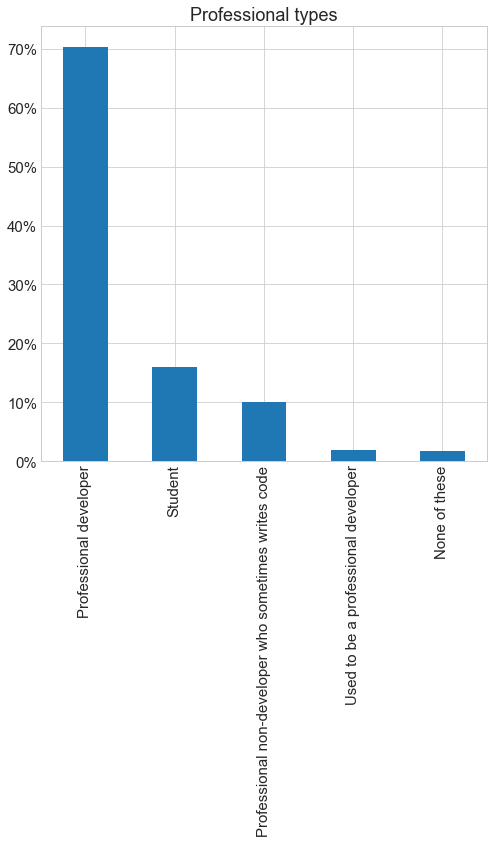

In [10]:
plt.rcParams['font.size']=15

perc_pro = df['Professional'].value_counts()/(df['Professional'].value_counts().sum())
ax = perc_pro.plot(kind='bar', title='Professional types')
ax.yaxis.set_major_formatter(mtick.PercentFormatter(1))

> __for the rest of this analysis will focus on the "Profesional developer" only__

In [11]:
df_pro = df.query('Professional == "Professional developer"')
df_pro.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36131 entries, 2 to 51390
Columns: 154 entries, Respondent to ExpectedSalary
dtypes: float64(6), int64(1), object(147)
memory usage: 42.7+ MB


## What is Salary for this population looks like?

1. First explore the different currency reported in the dataset

In [12]:
# filter dataset by removing all missing value in salary and missing Currency
df_pro = df_pro.dropna(subset=['Salary', 'Currency']).reset_index(drop=True)

In [13]:
df_pro.head()

,Respondent,Professional,ProgramHobby,Country,University,EmploymentStatus,FormalEducation,MajorUndergrad,HomeRemote,CompanySize,...,StackOverflowMakeMoney,Gender,HighestEducationParents,Race,SurveyLong,QuestionsInteresting,QuestionsConfusing,InterestedAnswers,Salary,ExpectedSalary
0,3,Professional developer,"Yes, both",United Kingdom,No,Employed full-time,Bachelor's degree,Computer science or software engineering,"Less than half the time, but at least one day ...","10,000 or more employees",...,Disagree,Male,A professional degree,White or of European descent,Somewhat agree,Agree,Disagree,Agree,113750.0,NaN
1,15,Professional developer,"Yes, I program as a hobby",United Kingdom,No,Employed full-time,Professional degree,Computer engineering or electrical/electronics...,All or almost all the time (I'm full-time remote),"5,000 to 9,999 employees",...,Disagree,Male,High school,White or of European descent,Somewhat agree,Agree,Disagree,Agree,100000.0,NaN
2,18,Professional developer,"Yes, both",United States,"Yes, part-time",Employed full-time,Bachelor's degree,Computer science or software engineering,All or almost all the time (I'm full-time remote),"1,000 to 4,999 employees",...,Disagree,Male,A master's degree,"Native American, Pacific Islander, or Indigeno...",Disagree,Agree,Disagree,Agree,130000.0,NaN
3,19,Professional developer,"Yes, I program as a hobby",United States,No,Employed full-time,Bachelor's degree,Computer science or software engineering,A few days each month,"10,000 or more employees",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,82500.0,NaN
4,23,Professional developer,No,Israel,No,Employed full-time,Bachelor's degree,Computer engineering or electrical/electronics...,A few days each month,500 to 999 employees,...,Somewhat agree,Male,A bachelor's degree,White or of European descent,Strongly agree,Somewhat agree,Somewhat agree,Agree,100764.0,NaN


In [14]:
df['Currency'].value_counts()

U.S. dollars ($)               7073
Euros (€)                      5849
Indian rupees (?)              2176
British pounds sterling (£)    2176
Canadian dollars (C$)          1062
Polish zloty (zl)               564
Australian dollars (A$)         469
Russian rubles (?)              366
Brazilian reais (R$)            359
Swedish kroner (SEK)            306
Swiss francs                    300
South African rands (R)         174
Mexican pesos (MXN$)            144
Japanese yen (¥)                123
Chinese yuan renminbi (¥)       121
Singapore dollars (S$)           79
Bitcoin (btc)                    67
Name: Currency, dtype: int64

2. Convert Salary to USD equivalent salary

In [15]:
# We are using our custom function ```convert2USB``` to change all currency if not USD.
df_pro['SalaryConv_USD'] = df_pro[['Salary', 'Currency']].apply(lambda x: convert2USD(x[1], np.round(x[0])),axis=1)

> checking for outliers salary

Text(0.5, 0, 'Survey answer among "Professional"')

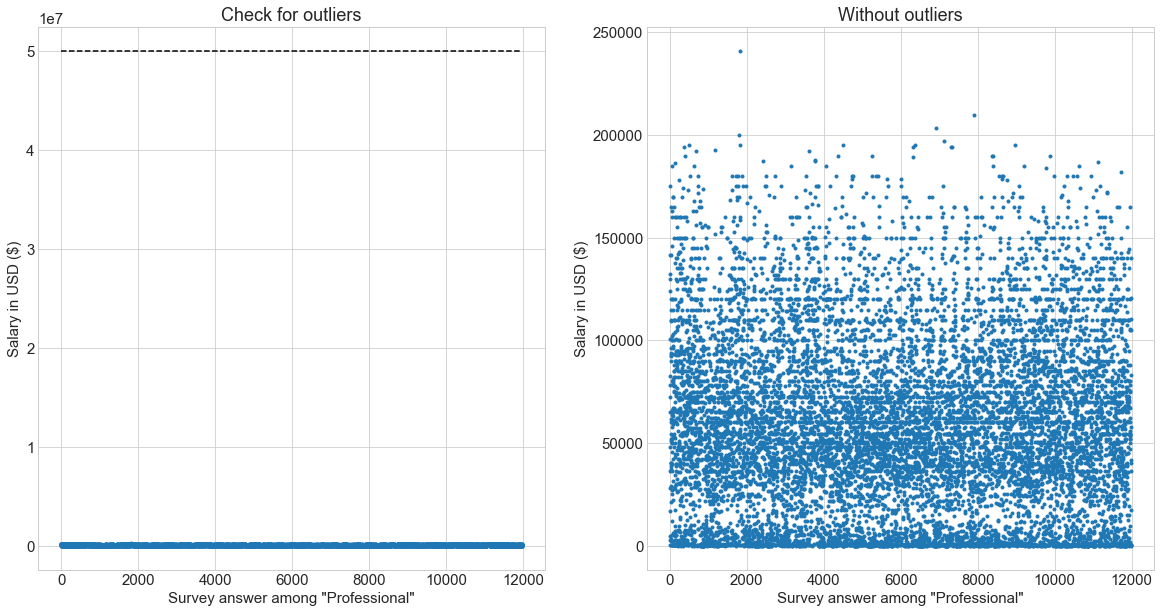

In [68]:
plt.rcParams['figure.figsize']=20, 10

thr = 0.5e8

plt.subplot(1,2,1)
df_pro['SalaryConv_USD'].plot(style='.-', title='Check for outliers')
plt.hlines(y = thr, xmin=0, xmax=len(df_pro), ls='dashed')
plt.ylabel('Salary in USD ($)')
plt.xlabel('Survey answer among "Professional"')

plt.subplot(1,2,2)
df_pro.query(f'SalaryConv_USD < {thr}')['SalaryConv_USD'].plot(style='.', title='Without outliers')
plt.ylabel('Salary in USD ($)')
plt.xlabel('Survey answer among "Professional"')

> __remove outliers in salary__ with threshold over $500000 

In [64]:
df_pro = df_pro.query(f'SalaryConv_USD < {thr}').reset_index(drop=True)

3. Distribution of salary over all "Professional" and by category of professional

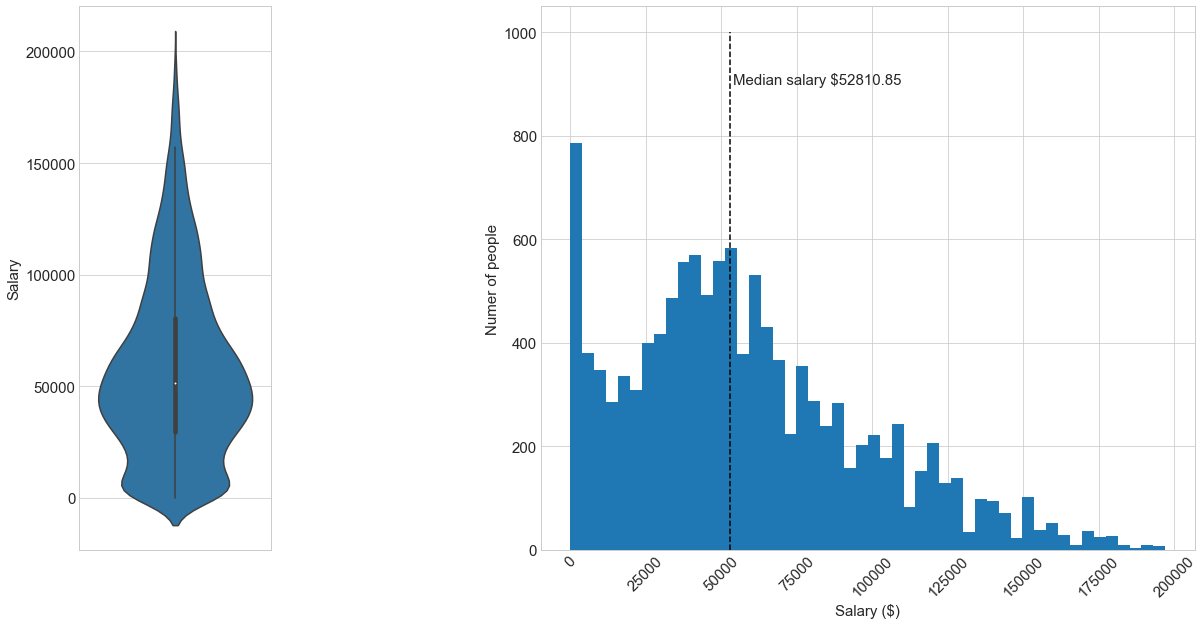

In [65]:
sal_median = df_pro['SalaryConv_USD'].median()

plt.subplot2grid((1,5),(0,2),colspan=3)
df_pro['Salary'].hist(bins=50, xrot=45)
plt.vlines(x = sal_median, ymin=0, ymax=1000, linestyles='--')
plt.text(sal_median+1000, 900, f'Median salary ${sal_median:.2f}')
plt.xlabel('Salary ($)')
plt.ylabel('Numer of people')

plt.subplot2grid((1,5),(0,0),colspan=1)
sns.violinplot(data=df_pro, y='Salary')

In [66]:
df_pro.query('SalaryConv_USD < 1000')['Country'].value_counts()

India                 792
Russian Federation    185
Poland                 72
Mexico                 67
Japan                  47
                     ... 
Nigeria                 1
Czech Republic          1
Spain                   1
Italy                   1
Ghana                   1
Name: Country, Length: 61, dtype: int64

## What kind of Developer type are these professional?

> We are using the ```getChoices()``` function to extract all unique possible choices in ```[DeveloperType]``` -> we will obtain all observations where each choices were found


In [69]:
dictIdx_Dev = getChoices(df_pro['DeveloperType'])
list(dictIdx_Dev.keys())

['Other',
 'Embedded applications/devices developer',
 'Web developer',
 'DevOps specialist',
 'Quality assurance engineer',
 'Mobile developer',
 'Desktop applications developer',
 'Graphics programming',
 'Developer with a statistics or mathematics background',
 'Systems administrator',
 'Data scientist',
 'Graphic designer',
 'Database administrator',
 'Machine learning specialist']

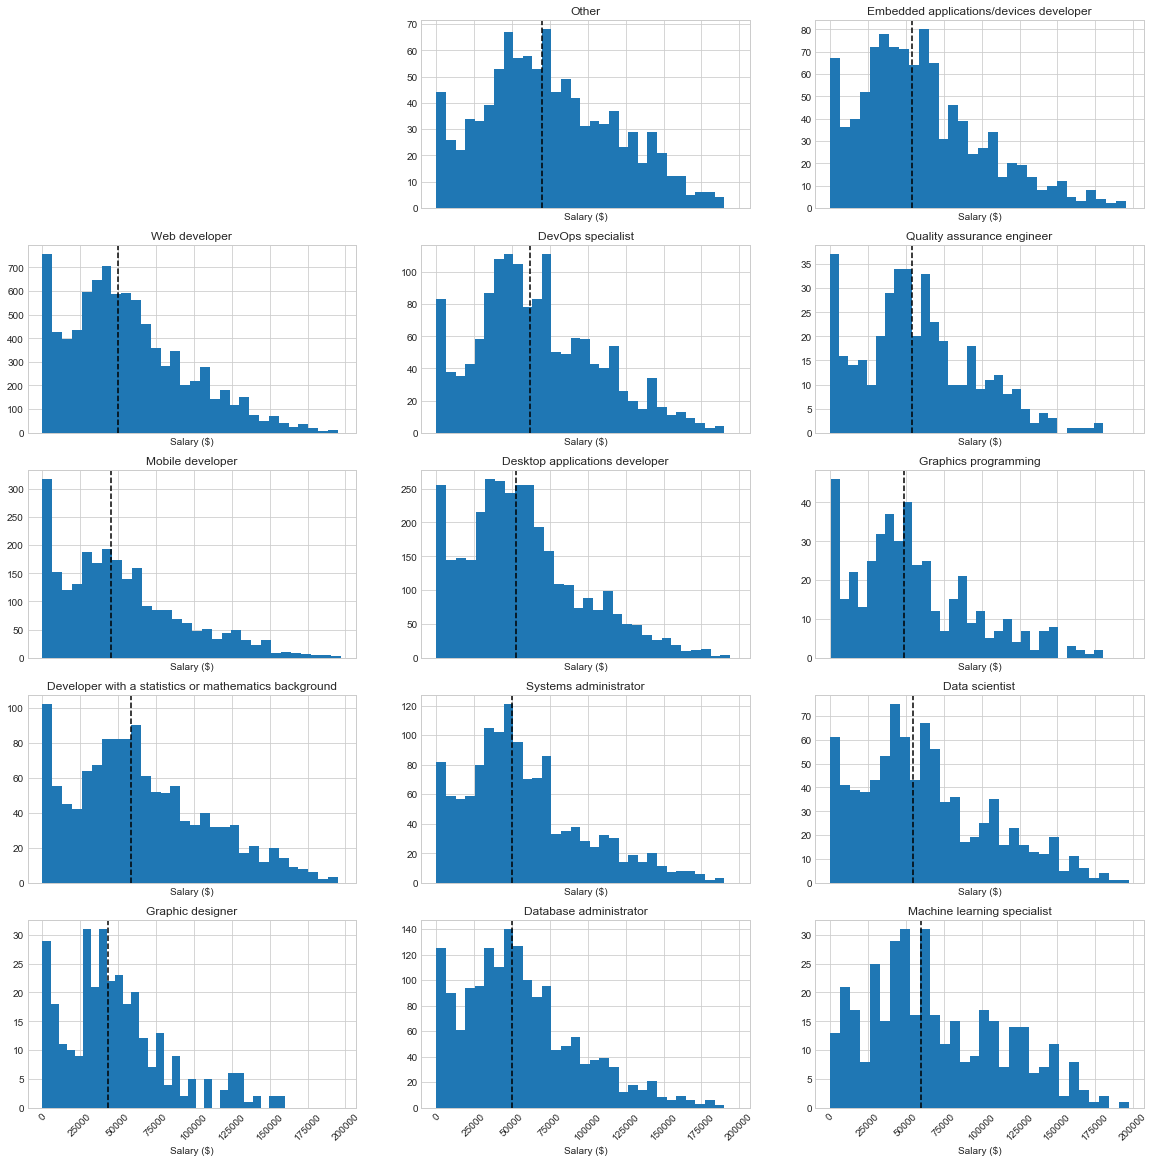

In [70]:
plt.rcParams['figure.figsize']= 20, 20
plt.rcParams['font.size']=10

f, axs = plt.subplots(5, 3, sharex=True)
for win, devtype in enumerate(dictIdx_Dev.keys()):
    idx = dictIdx_Dev[devtype]
    data = df_pro.reindex(idx)['Salary']
    med_sal = data.median()
    axis = axs.ravel()[win+1]
    data.hist(bins=30, xrot=45, ax = axis, density=False)
    axis.axvline(x=med_sal, linestyle='dashed', color='k')
    axis.set_title(devtype)
    axis.set_xlabel('Salary ($)')

f.delaxes(axs.ravel()[0])

___


# __Education Advices from "Professional"__

In [71]:
dictEducAdv = getChoices(df_pro['CousinEducation'])
# count values for each category of 'CousinEducation' 
AdvCount = {k: len(v) for k, v in dictEducAdv.items()}
# AdvCount = dict(sorted(AdvCount.items(), key=lambda x: x[1], reverse=True)) ## reorder dictionnary
AdvCount

{'Get a job as a QA tester': 926,
 'Conferences/meet-ups': 1580,
 'Take online courses': 4150,
 'Participate in online coding competitions': 864,
 'Buy books and work through the exercises': 3155,
 'None of these': 108,
 'Bootcamp': 1502,
 'Part-time/evening courses': 1943,
 'Contribute to open source': 2125,
 'Participate in hackathons': 745,
 'Other': 681,
 'Return to college': 1367,
 "Master's degree": 671}

In [86]:
sal_per_Adv = {k: df_pro['SalaryConv_USD'] for k, v in dictEducAdv.items()}
med_sal_per_Adv = {k: df_pro['SalaryConv_USD'].reindex(v).median() for k, v in dictEducAdv.items()}
std_sal_per_Adv = {k: df_pro['SalaryConv_USD'].reindex(v).std() for k, v in dictEducAdv.items()}
std_sal_per_Adv

{'Get a job as a QA tester': 43420.00922245089,
 'Conferences/meet-ups': 43431.71249463859,
 'Take online courses': 42854.08582494905,
 'Participate in online coding competitions': 41509.02041837788,
 'Buy books and work through the exercises': 43191.07770724858,
 'None of these': 41956.85538917023,
 'Bootcamp': 44611.0043785985,
 'Part-time/evening courses': 42207.51559099282,
 'Contribute to open source': 44117.7361026396,
 'Participate in hackathons': 44570.511576835044,
 'Other': 41026.06884385914,
 'Return to college': 40077.205476382456,
 "Master's degree": 44458.38048642209}

In [87]:
med_sal_per_Adv

{'Get a job as a QA tester': 53445.8260752229,
 'Conferences/meet-ups': 54364.106374375,
 'Take online courses': 50000.0,
 'Participate in online coding competitions': 41080.697413156246,
 'Buy books and work through the exercises': 52810.84619225,
 'None of these': 44133.4265532564,
 'Bootcamp': 54364.106374375,
 'Part-time/evening courses': 48303.9392751486,
 'Contribute to open source': 57806.560000000005,
 'Participate in hackathons': 54364.106374375,
 'Other': 57185.8096891796,
 'Return to college': 54364.106374375,
 "Master's degree": 57806.560000000005}

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12],
 <a list of 13 Text xticklabel objects>)

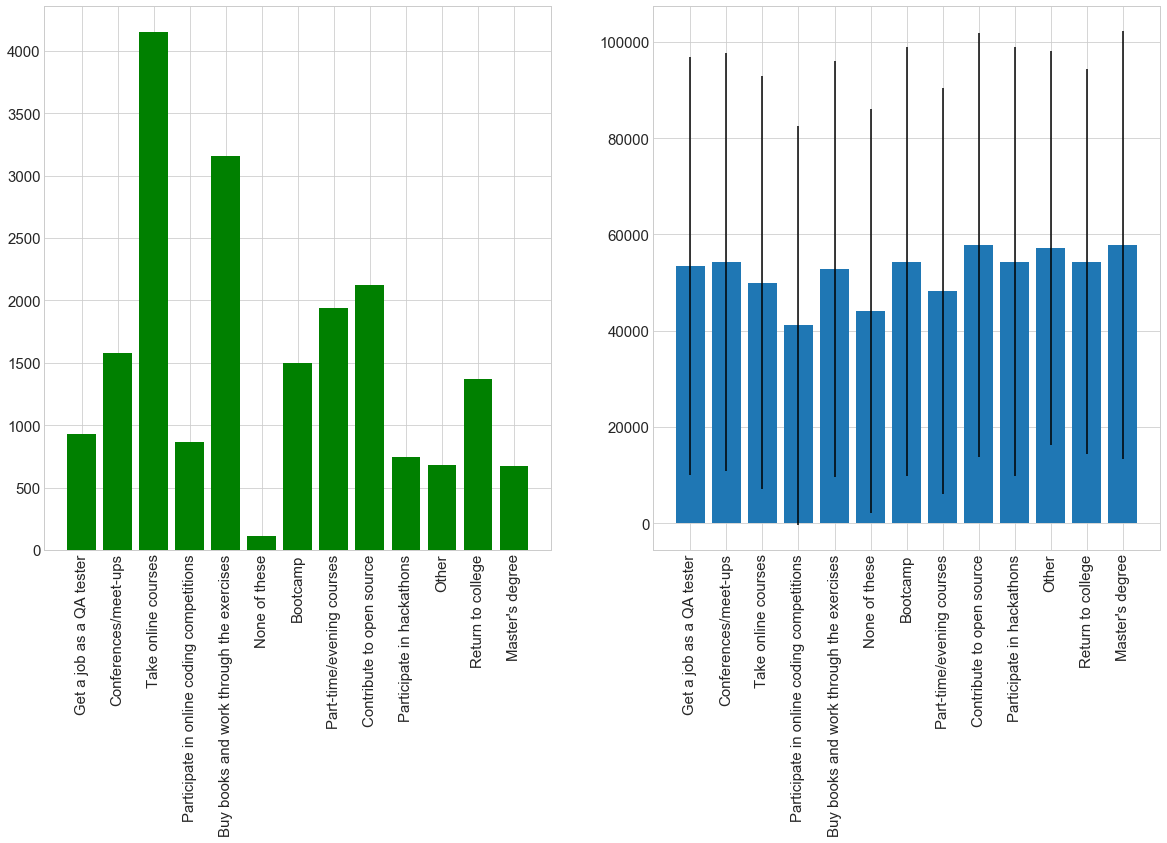

In [91]:
plt.rcParams['figure.figsize']=20, 10
plt.rcParams['font.size']=15

plt.subplot(1,2,1)
plt.bar(list(AdvCount.keys()), AdvCount.values(), color='g')
plt.xticks(rotation=90)

plt.subplot(1,2,2)
plt.bar(list(AdvCount.keys()),  med_sal_per_Adv.values(), yerr = std_sal_per_Adv.values())
plt.xticks(rotation=90)